<a href="https://colab.research.google.com/github/sid-nadella12/IC-CAP-python/blob/master/voff_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_table("/content/drive/My Drive/IDVG_AllVoff.txt") 
	# print(data)
table_data = np.asarray(data)
table_data

array([[-4.00000e+00,  1.13940e+00,  1.04296e+00, ...,  5.02390e-11,
         5.02340e-11,  5.02340e-11],
       [-3.90000e+00,  2.33209e+00,  2.19737e+00, ...,  5.02340e-11,
         5.02340e-11,  5.02340e-11],
       [-3.80000e+00,  3.78923e+00,  3.63602e+00, ...,  5.02340e-11,
         5.02340e-11,  5.02340e-11],
       ...,
       [-2.00000e-01,  7.83958e+01,  7.81764e+01, ...,  9.56098e-02,
         7.78504e-02,  6.29723e-02],
       [-1.00000e-01,  8.05915e+01,  8.03717e+01, ...,  4.93689e-01,
         4.33343e-01,  3.77698e-01],
       [ 0.00000e+00,  8.27905e+01,  8.25704e+01, ...,  1.34591e+00,
         1.24040e+00,  1.13940e+00]])

In [42]:
new_table = np.zeros((401, 42))
# Reshaping the data into 401*6   where we have ids-avg, sum-vg*ids, ids-max. 

for i in range(401):
	new_table[i][0] = np.around(-4.00 + i*0.01, decimals=2)
 
for voff in range(0, 401):
	new_table[voff, 1:42] = table_data[:, voff+1]
	# new_table[voff, 42] = np.mean(new_table[voff, 1:42])


new_table
# df = pd.DataFrame(new_table)
# df.rename(columns={0: 'voff'}, inplace=True)

# for vg in range(41):
# 	df.rename(columns={(vg+1): 'vg = ' + str(np.around(-4.0 + vg*0.1, decimals=1))}, inplace=True)
# df.rename(columns={42: 'ids_mean'}, inplace=True)

# df


array([[-4.00000e+00,  1.13940e+00,  2.33209e+00, ...,  7.83958e+01,
         8.05915e+01,  8.27905e+01],
       [-3.99000e+00,  1.04296e+00,  2.19737e+00, ...,  7.81764e+01,
         8.03717e+01,  8.25704e+01],
       [-3.98000e+00,  9.51051e-01,  2.06537e+00, ...,  7.79571e+01,
         8.01521e+01,  8.23504e+01],
       ...,
       [-2.00000e-02,  5.02390e-11,  5.02340e-11, ...,  9.56098e-02,
         4.93689e-01,  1.34591e+00],
       [-1.00000e-02,  5.02340e-11,  5.02340e-11, ...,  7.78504e-02,
         4.33343e-01,  1.24040e+00],
       [ 0.00000e+00,  5.02340e-11,  5.02340e-11, ...,  6.29723e-02,
         3.77698e-01,  1.13940e+00]])

In [60]:
# Normalizing the data
new_table[:,0] = new_table[:,0]  / np.min(new_table[:,0])
for i in range(1, 42):
  new_table[:,i] = new_table[:,i]  / np.max(new_table[:,i])


new_table



array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 9.97500000e-01,  9.15358961e-01,  9.42232075e-01, ...,
         9.97201381e-01,  9.97272665e-01,  9.97341482e-01],
       [ 9.95000000e-01,  8.34694576e-01,  8.85630486e-01, ...,
         9.94404037e-01,  9.94547812e-01,  9.94684173e-01],
       ...,
       [ 5.00000000e-03,  4.40925048e-11,  2.15403351e-11, ...,
         1.21957809e-03,  6.12581972e-03,  1.62568169e-02],
       [ 2.50000000e-03,  4.40881166e-11,  2.15403351e-11, ...,
         9.93042995e-04,  5.37703108e-03,  1.49823953e-02],
       [-0.00000000e+00,  4.40881166e-11,  2.15403351e-11, ...,
         8.03261144e-04,  4.68657365e-03,  1.37624486e-02]])

In [61]:
df = pd.DataFrame(new_table)
df.rename(columns={0: 'voff'}, inplace=True)
for vg in range(41):
	df.rename(columns={(vg+1): 'vg = ' + str(np.around(-4.0 + vg*0.1, decimals=1))}, inplace=True)

df

,voff,vg = -4.0,vg = -3.9,vg = -3.8,vg = -3.7,vg = -3.6,vg = -3.5,vg = -3.4,vg = -3.3,vg = -3.2,vg = -3.1,vg = -3.0,vg = -2.9,vg = -2.8,vg = -2.7,vg = -2.6,vg = -2.5,vg = -2.4,vg = -2.3,vg = -2.2,vg = -2.1,vg = -2.0,vg = -1.9,vg = -1.8,vg = -1.7,vg = -1.6,vg = -1.5,vg = -1.4,vg = -1.3,vg = -1.2,vg = -1.1,vg = -1.0,vg = -0.9,vg = -0.8,vg = -0.7,vg = -0.6,vg = -0.5,vg = -0.4,vg = -0.3,vg = -0.2,vg = -0.1,vg = 0.0
0,1.0000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.9975,9.153590e-01,9.422321e-01,9.595670e-01,9.690532e-01,9.751169e-01,9.793569e-01,9.824485e-01,9.847748e-01,9.865851e-01,9.880321e-01,9.892007e-01,9.901757e-01,9.909919e-01,9.916862e-01,9.922887e-01,9.928077e-01,9.932655e-01,9.936673e-01,9.940224e-01,9.943466e-01,9.946344e-01,9.948961e-01,9.951306e-01,9.953461e-01,9.955450e-01,9.957253e-01,9.958931e-01,9.960479e-01,9.961895e-01,9.963244e-01,9.964483e-01,9.965639e-01,9.966720e-01,9.967748e-01,9.968700e-01,9.969595e-01,0.997045,0.997125,0.997201,0.997273,0.997341
2,0.9950,8.346946e-01,8.856305e-01,9.195377e-01,9.383378e-01,9.503558e-01,9.587841e-01,9.649340e-01,9.695810e-01,9.731973e-01,9.760762e-01,9.784175e-01,9.803609e-01,9.819925e-01,9.833804e-01,9.845811e-01,9.856188e-01,9.865311e-01,9.873375e-01,9.880505e-01,9.886932e-01,9.892689e-01,9.897898e-01,9.902613e-01,9.906944e-01,9.910879e-01,9.914525e-01,9.917861e-01,9.920958e-01,9.923808e-01,9.926488e-01,9.928966e-01,9.931278e-01,9.933456e-01,9.935497e-01,9.937414e-01,9.939203e-01,0.994092,0.994251,0.994404,0.994548,0.994684
3,0.9925,7.579875e-01,8.303067e-01,8.799176e-01,9.078595e-01,9.257208e-01,9.382829e-01,9.474657e-01,9.544185e-01,9.598232e-01,9.641323e-01,9.676397e-01,9.705511e-01,9.729975e-01,9.750787e-01,9.768773e-01,9.784334e-01,9.797999e-01,9.810078e-01,9.820786e-01,9.830425e-01,9.839059e-01,9.846859e-01,9.853942e-01,9.860427e-01,9.866349e-01,9.871798e-01,9.876811e-01,9.881438e-01,9.885739e-01,9.889732e-01,9.893465e-01,9.896933e-01,9.900191e-01,9.903260e-01,9.906113e-01,9.908826e-01,0.991137,0.991378,0.991607,0.991822,0.992027
4,0.9900,6.852019e-01,7.763851e-01,8.407196e-01,8.776256e-01,9.012177e-01,9.178566e-01,9.300527e-01,9.392796e-01,9.464695e-01,9.522064e-01,9.568778e-01,9.607508e-01,9.640113e-01,9.667810e-01,9.691734e-01,9.712515e-01,9.730718e-01,9.746811e-01,9.761096e-01,9.773918e-01,9.785428e-01,9.795843e-01,9.805294e-01,9.813910e-01,9.821820e-01,9.829071e-01,9.835761e-01,9.841935e-01,9.847652e-01,9.852993e-01,9.857948e-01,9.862587e-01,9.866927e-01,9.871008e-01,9.874842e-01,9.878434e-01,0.988185,0.988506,0.988809,0.989097,0.989371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,0.0100,4.408812e-11,2.154034e-11,1.325705e-11,9.302196e-12,7.044118e-12,5.614136e-12,4.640426e-12,3.940354e-12,3.415536e-12,3.008979e-12,2.685592e-12,2.422760e-12,2.205238e-12,2.022449e-12,1.866838e-12,1.732846e-12,1.616333e-12,1.514130e-12,1.423790e-12,1.343389e-12,1.271383e-12,1.206542e-12,1.147852e-12,1.094489e-12,1.045764e-12,1.001102e-12,9.600180e-13,9.222856e-13,9.252473e-13,1.402849e-12,8.028151e-12,9.199541e-11,7.799932e-10,7.810800e-09,1.020294e-07,1.333619e-06,0.000017,0.000207,0.001800,0.007795,0.018965
397,0.0075,4.408812e-11,2.154034e-11,1.325705e-11,9.302196e-12,7.044118e-12,5.614136e-12,4.640426e-12,3.940354e-12,3.415536e-12,3.008979e-12,2.685592e-12,2.422760e-12,2.205238e-12,2.022449e-12,1.866838e-12,1.732846e-12,1.616333e-12,1.514130e-12,1.423790e-12,1.343389e-12,1.271383

In [62]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.2.0-rc3


In [0]:
dataset = df.copy()

In [0]:
train_dataset = dataset.sample(frac=0.70,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [65]:
train_dataset

,voff,vg = -4.0,vg = -3.9,vg = -3.8,vg = -3.7,vg = -3.6,vg = -3.5,vg = -3.4,vg = -3.3,vg = -3.2,vg = -3.1,vg = -3.0,vg = -2.9,vg = -2.8,vg = -2.7,vg = -2.6,vg = -2.5,vg = -2.4,vg = -2.3,vg = -2.2,vg = -2.1,vg = -2.0,vg = -1.9,vg = -1.8,vg = -1.7,vg = -1.6,vg = -1.5,vg = -1.4,vg = -1.3,vg = -1.2,vg = -1.1,vg = -1.0,vg = -0.9,vg = -0.8,vg = -0.7,vg = -0.6,vg = -0.5,vg = -0.4,vg = -0.3,vg = -0.2,vg = -0.1,vg = 0.0
199,0.5025,4.408812e-11,2.154034e-11,1.325705e-11,9.302196e-12,7.044118e-12,5.614136e-12,4.640426e-12,3.939962e-12,3.474438e-12,3.884898e-12,1.343299e-11,1.320244e-10,1.276833e-09,9.808199e-09,1.209323e-07,1.515087e-06,1.892455e-05,2.275681e-04,2.206525e-03,1.158873e-02,3.139355e-02,5.930822e-02,9.011962e-02,1.213268e-01,1.521710e-01,1.820109e-01,2.105202e-01,2.375835e-01,0.263186,0.287361,0.310174,0.331697,0.352014,0.371201,0.389335,0.406489,0.422733,0.438129,0.452737,0.466612,0.479806
322,0.1950,4.408812e-11,2.154034e-11,1.325705e-11,9.302196e-12,7.044118e-12,5.614136e-12,4.640426e-12,3.940354e-12,3.415536e-12,3.008979e-12,2.685592e-12,2.422760e-12,2.205238e-12,2.022449e-12,1.866838e-12,1.732846e-12,1.616333e-12,1.514130e-12,1.423790e-12,1.343255e-12,1.278189e-12,1.364278e-12,3.247478e-12,2.811784e-11,3.174035e-10,2.321483e-09,2.847967e-08,3.694392e-07,0.000005,0.000060,0.000664,0.004445,0.014565,0.030612,0.050028,0.070545,0.091567,0.112580,0.133243,0.153376,0.172886
59,0.8525,2.855994e-06,1.883345e-05,1.552178e-04,1.398085e-03,1.091666e-02,4.843028e-02,1.145834e-01,1.936903e-01,2.681591e-01,3.335526e-01,3.907854e-01,4.404834e-01,4.835817e-01,5.210925e-01,5.539158e-01,5.827943e-01,6.083561e-01,6.311037e-01,6.514587e-01,6.697608e-01,6.862923e-01,7.012876e-01,7.149451e-01,7.274300e-01,7.388817e-01,7.494216e-01,7.591508e-01,7.681565e-01,0.776514,0.784292,0.791545,0.798325,0.804675,0.810636,0.816239,0.821518,0.826498,0.831204,0.835658,0.839879,0.843885
78,0.8050,3.096103e-08,1.348666e-07,1.114174e-06,1.054833e-05,1.067805e-04,1.081883e-03,8.832069e-03,3.872496e-02,9.151181e-02,1.562592e-01,2.192013e-01,2.767433e-01,3.287510e-01,3.751870e-01,4.164728e-01,4.531948e-01,4.859519e-01,5.152727e-01,5.416205e-01,5.653924e-01,5.869232e-01,6.064989e-01,6.243559e-01,6.407058e-01,6.557206e-01,6.695530e-01,6.823306e-01,6.941666e-01,0.705160,0.715393,0.724940,0.733867,0.742234,0.750087,0.757471,0.764428,0.770994,0.777200,0.783074,0.788640,0.793924
65,0.8375,5.994866e-07,3.953102e-06,3.277869e-05,3.052129e-04,2.819526e-03,1.895198e-02,6.486970e-02,1.324404e-01,2.066143e-01,2.741870e-01,3.343026e-01,3.873156e-01,4.337248e-01,4.743460e-01,5.100265e-01,5.415067e-01,5.694263e-01,5.943129e-01,6.166051e-01,6.366668e-01,6.548000e-01,6.712622e-01,6.862591e-01,6.999773e-01,7.125638e-01,7.241499e-01,7.348474e-01,7.447506e-01,0.753946,0.762501,0.770482,0.777943,0.784931,0.791491,0.797657,0.803468,0.808950,0.814131,0.819034,0.823681,0.828091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0.8000,2.080999e-08,8.118169e-08,6.619287e-07,6.270677e-06,6.368074e-05,6.568575e-04,5.817141e-03,2.962663e-02,7.747068e-02,1.396904e-01,2.025785e-01,2.604504e-01,3.130609e-01,3.602423e-01,4.022989e-01,4.397692e-01,4.732295e-01,5.032040e-01,5.301585e-01,5.544867e-01,5.765287e-01,5.965745e-01,6.148640e-01,6.316137e-01,6.469980e-01,6.611730e-01,6.742696e-01,6.864001e-01,0.697668,0.708157,0.717946,0.727098,0.735674,0.743725,0.751297,0.758431,0.765163,0.771525,0.777548,0.783256,0.788675
258,0.3550,4.408812e-11,2.154034e-11,1.325705e-11,9.302196e-12,7.044118e-12,5.614136e-12,4.640426e-12,3.940354e-12,3.415536e-12,3.008979e-12,2.685592e-12,2.422760e-12,2.205238e-12,2.022248e-12,1.911062e-12,2.390141e-12,1.001033e-11,1.061085e-10,9.998611e-10,8.411114e-09,1.068520e-07,1.368171e-06,1.740007e-05,2.109157e-04,1.990390e-03,9.838617e-03,2.572158e-02,4.788565e-02,0.072398,0.097598,0.122854,0.147630,0.171632,0.194722,0.216847,0.237996,0.258183,0.277441,

In [66]:
test_dataset

,voff,vg = -4.0,vg = -3.9,vg = -3.8,vg = -3.7,vg = -3.6,vg = -3.5,vg = -3.4,vg = -3.3,vg = -3.2,vg = -3.1,vg = -3.0,vg = -2.9,vg = -2.8,vg = -2.7,vg = -2.6,vg = -2.5,vg = -2.4,vg = -2.3,vg = -2.2,vg = -2.1,vg = -2.0,vg = -1.9,vg = -1.8,vg = -1.7,vg = -1.6,vg = -1.5,vg = -1.4,vg = -1.3,vg = -1.2,vg = -1.1,vg = -1.0,vg = -0.9,vg = -0.8,vg = -0.7,vg = -0.6,vg = -0.5,vg = -0.4,vg = -0.3,vg = -0.2,vg = -0.1,vg = 0.0
0,1.0000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000
9,0.9775,3.803256e-01,5.318834e-01,6.516575e-01,7.303300e-01,7.808575e-01,8.169231e-01,8.436782e-01,8.640713e-01,8.800272e-01,8.928043e-01,9.032237e-01,9.118799e-01,9.191638e-01,9.253770e-01,9.307322e-01,9.353900e-01,9.394736e-01,9.430837e-01,9.462926e-01,9.491676e-01,9.517530e-01,9.540936e-01,9.562169e-01,9.581543e-01,9.599298e-01,9.615594e-01,9.630624e-01,9.644515e-01,9.657393e-01,9.669382e-01,9.680543e-01,9.690972e-01,9.700727e-01,9.709898e-01,9.718498e-01,9.726603e-01,0.973426,0.974147,0.974832,0.975478,0.976093
23,0.9425,2.825522e-02,1.025286e-01,2.279226e-01,3.585681e-01,4.675433e-01,5.479186e-01,6.098334e-01,6.585460e-01,6.973721e-01,7.288241e-01,7.546966e-01,7.762971e-01,7.945644e-01,8.101875e-01,8.236883e-01,8.354531e-01,8.457930e-01,8.549378e-01,8.630828e-01,8.703839e-01,8.769542e-01,8.829030e-01,8.883065e-01,8.932375e-01,8.977552e-01,9.019086e-01,9.057373e-01,9.092785e-01,9.125622e-01,9.156158e-01,9.184632e-01,9.211217e-01,9.236126e-01,9.259487e-01,9.281441e-01,9.302125e-01,0.932162,0.934006,0.935749,0.937402,0.938970
25,0.9375,1.764701e-02,7.271503e-02,1.853237e-01,3.126589e-01,4.261163e-01,5.115766e-01,5.776403e-01,6.299264e-01,6.717654e-01,7.057270e-01,7.337129e-01,7.571018e-01,7.768949e-01,7.938337e-01,8.084776e-01,8.212409e-01,8.324592e-01,8.423899e-01,8.512325e-01,8.591600e-01,8.662965e-01,8.727552e-01,8.786249e-01,8.839820e-01,8.888910e-01,8.934010e-01,8.975616e-01,9.014092e-01,9.049766e-01,9.082952e-01,9.113876e-01,9.142780e-01,9.169842e-01,9.195235e-01,9.219084e-01,9.241565e-01,0.926276,0.928278,0.930174,0.931969,0.933674
28,0.9300,8.496086e-03,4.099747e-02,1.302874e-01,2.492320e-01,3.658078e-01,4.582326e-01,5.300592e-01,5.874174e-01,6.336203e-01,6.712729e-01,7.023684e-01,7.284052e-01,7.504631e-01,7.693553e-01,7.856968e-01,7.999538e-01,8.124907e-01,8.235876e-01,8.334755e-01,8.423389e-01,8.503213e-01,8.575467e-01,8.641128e-01,8.701097e-01,8.756009e-01,8.806486e-01,8.853039e-01,8.896117e-01,8.936052e-01,8.973194e-01,9.007817e-01,9.040172e-01,9.070462e-01,9.098895e-01,9.125599e-01,9.150753e-01,0.917449,0.919691,0.921813,0.923823,0.925732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,0.0425,4.408812e-11,2.154034e-11,1.325705e-11,9.302196e-12,7.044118e-12,5.614136e-12,4.640426e-12,3.940354e-12,3.415536e-12,3.008979e-12,2.685592e-12,2.422760e-12,2.205238e-12,2.022449e-12,1.866838e-12,1.732846e-12,1.616333e-12,1.514130e-12,1.423790e-12,1.343389e-12,1.271383e-12,1.206542e-12,1.147852e-12,1.094489e-12,1.045764e-12,1.001002e-12,9.631580e-13,1.013954e-12,2.136284e-12,1.713622e-11,1.979871e-10,1.469997e-09,1.759405e-08,2.299546e-07,2.996969e-06,3.827355e-05,0.000435,0.003138,0.011017,0.024027,0.040273
385,0.0375,4.408812e-11,2.154034e-11,1.325705e-11,9.302196e-12,7.044118e-12,5.614136e-12,4.640426e-12,3.940354e-12,3.415536e-12,3.008979e-12,2.685592e-12,2.422760e-12,2.205238e-12,2.022449e-12,1.866838e-12,1.732846e-12,1.616333e-12,1.514130e-12,1.423790e-12,1.343389e-12,1.271

In [0]:
train_labels = train_dataset.pop('voff')
test_labels = test_dataset.pop('voff')

In [68]:
train_labels

199    0.5025
322    0.1950
59     0.8525
78     0.8050
65     0.8375
        ...  
80     0.8000
258    0.3550
11     0.9725
299    0.2525
86     0.7850
Name: voff, Length: 281, dtype: float64

In [69]:
test_labels

0      1.0000
9      0.9775
23     0.9425
25     0.9375
28     0.9300
        ...  
383    0.0425
385    0.0375
387    0.0325
388    0.0300
399    0.0025
Name: voff, Length: 120, dtype: float64

In [70]:
train_dataset

,vg = -4.0,vg = -3.9,vg = -3.8,vg = -3.7,vg = -3.6,vg = -3.5,vg = -3.4,vg = -3.3,vg = -3.2,vg = -3.1,vg = -3.0,vg = -2.9,vg = -2.8,vg = -2.7,vg = -2.6,vg = -2.5,vg = -2.4,vg = -2.3,vg = -2.2,vg = -2.1,vg = -2.0,vg = -1.9,vg = -1.8,vg = -1.7,vg = -1.6,vg = -1.5,vg = -1.4,vg = -1.3,vg = -1.2,vg = -1.1,vg = -1.0,vg = -0.9,vg = -0.8,vg = -0.7,vg = -0.6,vg = -0.5,vg = -0.4,vg = -0.3,vg = -0.2,vg = -0.1,vg = 0.0
199,4.408812e-11,2.154034e-11,1.325705e-11,9.302196e-12,7.044118e-12,5.614136e-12,4.640426e-12,3.939962e-12,3.474438e-12,3.884898e-12,1.343299e-11,1.320244e-10,1.276833e-09,9.808199e-09,1.209323e-07,1.515087e-06,1.892455e-05,2.275681e-04,2.206525e-03,1.158873e-02,3.139355e-02,5.930822e-02,9.011962e-02,1.213268e-01,1.521710e-01,1.820109e-01,2.105202e-01,2.375835e-01,0.263186,0.287361,0.310174,0.331697,0.352014,0.371201,0.389335,0.406489,0.422733,0.438129,0.452737,0.466612,0.479806
322,4.408812e-11,2.154034e-11,1.325705e-11,9.302196e-12,7.044118e-12,5.614136e-12,4.640426e-12,3.940354e-12,3.415536e-12,3.008979e-12,2.685592e-12,2.422760e-12,2.205238e-12,2.022449e-12,1.866838e-12,1.732846e-12,1.616333e-12,1.514130e-12,1.423790e-12,1.343255e-12,1.278189e-12,1.364278e-12,3.247478e-12,2.811784e-11,3.174035e-10,2.321483e-09,2.847967e-08,3.694392e-07,0.000005,0.000060,0.000664,0.004445,0.014565,0.030612,0.050028,0.070545,0.091567,0.112580,0.133243,0.153376,0.172886
59,2.855994e-06,1.883345e-05,1.552178e-04,1.398085e-03,1.091666e-02,4.843028e-02,1.145834e-01,1.936903e-01,2.681591e-01,3.335526e-01,3.907854e-01,4.404834e-01,4.835817e-01,5.210925e-01,5.539158e-01,5.827943e-01,6.083561e-01,6.311037e-01,6.514587e-01,6.697608e-01,6.862923e-01,7.012876e-01,7.149451e-01,7.274300e-01,7.388817e-01,7.494216e-01,7.591508e-01,7.681565e-01,0.776514,0.784292,0.791545,0.798325,0.804675,0.810636,0.816239,0.821518,0.826498,0.831204,0.835658,0.839879,0.843885
78,3.096103e-08,1.348666e-07,1.114174e-06,1.054833e-05,1.067805e-04,1.081883e-03,8.832069e-03,3.872496e-02,9.151181e-02,1.562592e-01,2.192013e-01,2.767433e-01,3.287510e-01,3.751870e-01,4.164728e-01,4.531948e-01,4.859519e-01,5.152727e-01,5.416205e-01,5.653924e-01,5.869232e-01,6.064989e-01,6.243559e-01,6.407058e-01,6.557206e-01,6.695530e-01,6.823306e-01,6.941666e-01,0.705160,0.715393,0.724940,0.733867,0.742234,0.750087,0.757471,0.764428,0.770994,0.777200,0.783074,0.788640,0.793924
65,5.994866e-07,3.953102e-06,3.277869e-05,3.052129e-04,2.819526e-03,1.895198e-02,6.486970e-02,1.324404e-01,2.066143e-01,2.741870e-01,3.343026e-01,3.873156e-01,4.337248e-01,4.743460e-01,5.100265e-01,5.415067e-01,5.694263e-01,5.943129e-01,6.166051e-01,6.366668e-01,6.548000e-01,6.712622e-01,6.862591e-01,6.999773e-01,7.125638e-01,7.241499e-01,7.348474e-01,7.447506e-01,0.753946,0.762501,0.770482,0.777943,0.784931,0.791491,0.797657,0.803468,0.808950,0.814131,0.819034,0.823681,0.828091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,2.080999e-08,8.118169e-08,6.619287e-07,6.270677e-06,6.368074e-05,6.568575e-04,5.817141e-03,2.962663e-02,7.747068e-02,1.396904e-01,2.025785e-01,2.604504e-01,3.130609e-01,3.602423e-01,4.022989e-01,4.397692e-01,4.732295e-01,5.032040e-01,5.301585e-01,5.544867e-01,5.765287e-01,5.965745e-01,6.148640e-01,6.316137e-01,6.469980e-01,6.611730e-01,6.742696e-01,6.864001e-01,0.697668,0.708157,0.717946,0.727098,0.735674,0.743725,0.751297,0.758431,0.765163,0.771525,0.777548,0.783256,0.788675
258,4.408812e-11,2.154034e-11,1.325705e-11,9.302196e-12,7.044118e-12,5.614136e-12,4.640426e-12,3.940354e-12,3.415536e-12,3.008979e-12,2.685592e-12,2.422760e-12,2.205238e-12,2.022248e-12,1.911062e-12,2.390141e-12,1.001033e-11,1.061085e-10,9.998611e-10,8.411114e-09,1.068520e-07,1.368171e-06,1.740007e-05,2.109157e-04,1.990390e-03,9.838617e-03,2.572158e-02,4.788565e-02,0.072398,0.097598,0.122854,0.147630,0.171632,0.194722,0.216847,0.237996,0.258183,0.277441,0.295808,0.313326,0.330038
11,2.868080e-01,4.472212e-01,5.

In [71]:
test_dataset

,vg = -4.0,vg = -3.9,vg = -3.8,vg = -3.7,vg = -3.6,vg = -3.5,vg = -3.4,vg = -3.3,vg = -3.2,vg = -3.1,vg = -3.0,vg = -2.9,vg = -2.8,vg = -2.7,vg = -2.6,vg = -2.5,vg = -2.4,vg = -2.3,vg = -2.2,vg = -2.1,vg = -2.0,vg = -1.9,vg = -1.8,vg = -1.7,vg = -1.6,vg = -1.5,vg = -1.4,vg = -1.3,vg = -1.2,vg = -1.1,vg = -1.0,vg = -0.9,vg = -0.8,vg = -0.7,vg = -0.6,vg = -0.5,vg = -0.4,vg = -0.3,vg = -0.2,vg = -0.1,vg = 0.0
0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000
9,3.803256e-01,5.318834e-01,6.516575e-01,7.303300e-01,7.808575e-01,8.169231e-01,8.436782e-01,8.640713e-01,8.800272e-01,8.928043e-01,9.032237e-01,9.118799e-01,9.191638e-01,9.253770e-01,9.307322e-01,9.353900e-01,9.394736e-01,9.430837e-01,9.462926e-01,9.491676e-01,9.517530e-01,9.540936e-01,9.562169e-01,9.581543e-01,9.599298e-01,9.615594e-01,9.630624e-01,9.644515e-01,9.657393e-01,9.669382e-01,9.680543e-01,9.690972e-01,9.700727e-01,9.709898e-01,9.718498e-01,9.726603e-01,0.973426,0.974147,0.974832,0.975478,0.976093
23,2.825522e-02,1.025286e-01,2.279226e-01,3.585681e-01,4.675433e-01,5.479186e-01,6.098334e-01,6.585460e-01,6.973721e-01,7.288241e-01,7.546966e-01,7.762971e-01,7.945644e-01,8.101875e-01,8.236883e-01,8.354531e-01,8.457930e-01,8.549378e-01,8.630828e-01,8.703839e-01,8.769542e-01,8.829030e-01,8.883065e-01,8.932375e-01,8.977552e-01,9.019086e-01,9.057373e-01,9.092785e-01,9.125622e-01,9.156158e-01,9.184632e-01,9.211217e-01,9.236126e-01,9.259487e-01,9.281441e-01,9.302125e-01,0.932162,0.934006,0.935749,0.937402,0.938970
25,1.764701e-02,7.271503e-02,1.853237e-01,3.126589e-01,4.261163e-01,5.115766e-01,5.776403e-01,6.299264e-01,6.717654e-01,7.057270e-01,7.337129e-01,7.571018e-01,7.768949e-01,7.938337e-01,8.084776e-01,8.212409e-01,8.324592e-01,8.423899e-01,8.512325e-01,8.591600e-01,8.662965e-01,8.727552e-01,8.786249e-01,8.839820e-01,8.888910e-01,8.934010e-01,8.975616e-01,9.014092e-01,9.049766e-01,9.082952e-01,9.113876e-01,9.142780e-01,9.169842e-01,9.195235e-01,9.219084e-01,9.241565e-01,0.926276,0.928278,0.930174,0.931969,0.933674
28,8.496086e-03,4.099747e-02,1.302874e-01,2.492320e-01,3.658078e-01,4.582326e-01,5.300592e-01,5.874174e-01,6.336203e-01,6.712729e-01,7.023684e-01,7.284052e-01,7.504631e-01,7.693553e-01,7.856968e-01,7.999538e-01,8.124907e-01,8.235876e-01,8.334755e-01,8.423389e-01,8.503213e-01,8.575467e-01,8.641128e-01,8.701097e-01,8.756009e-01,8.806486e-01,8.853039e-01,8.896117e-01,8.936052e-01,8.973194e-01,9.007817e-01,9.040172e-01,9.070462e-01,9.098895e-01,9.125599e-01,9.150753e-01,0.917449,0.919691,0.921813,0.923823,0.925732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,4.408812e-11,2.154034e-11,1.325705e-11,9.302196e-12,7.044118e-12,5.614136e-12,4.640426e-12,3.940354e-12,3.415536e-12,3.008979e-12,2.685592e-12,2.422760e-12,2.205238e-12,2.022449e-12,1.866838e-12,1.732846e-12,1.616333e-12,1.514130e-12,1.423790e-12,1.343389e-12,1.271383e-12,1.206542e-12,1.147852e-12,1.094489e-12,1.045764e-12,1.001002e-12,9.631580e-13,1.013954e-12,2.136284e-12,1.713622e-11,1.979871e-10,1.469997e-09,1.759405e-08,2.299546e-07,2.996969e-06,3.827355e-05,0.000435,0.003138,0.011017,0.024027,0.040273
385,4.408812e-11,2.154034e-11,1.325705e-11,9.302196e-12,7.044118e-12,5.614136e-12,4.640426e-12,3.940354e-12,3.415536e-12,3.008979e-12,2.685592e-12,2.422760e-12,2.205238e-12,2.022449e-12,1.866838e-12,1.732846e-12,1.616333e-12,1.514130e-12,1.423790e-12,1.343389e-12,1.271383e-12,1.206542e-12,1.147852e-12,1.094489e-12,1.045764e-1

In [0]:
from keras import optimizers


model = keras.Sequential()
model.add(layers.Dense(32, activation='elu', input_shape=[len(train_dataset.keys())]))
model.add(layers.Dense(64, activation='elu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='elu'))
model.add(layers.Dense(1))


optimizer = tf.keras.optimizers.RMSprop(0.0001)

model.compile(loss='mse',
                optimizer='Adam',
                metrics=['accuracy'])


In [73]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                1344      
_________________________________________________________________
dense_13 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 129       
Total params: 11,905
Trainable params: 11,905
Non-trainable params: 0
_________________________________________________________________


In [74]:
EPOCHS = 1000


history = model.fit(
  train_dataset, train_labels,
  epochs=EPOCHS, validation_split = 0.2
 )


Epoch 1/1000
7/7 [==============================] - 0s 22ms/step - loss: 0.1814 - accuracy: 0.0045 - val_loss: 0.1530 - val_accuracy: 0.0000e+00
Epoch 2/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.1114 - accuracy: 0.0045 - val_loss: 0.0181 - val_accuracy: 0.0000e+00
Epoch 3/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.0611 - accuracy: 0.0045 - val_loss: 0.0379 - val_accuracy: 0.0000e+00
Epoch 4/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.0309 - accuracy: 0.0045 - val_loss: 0.0086 - val_accuracy: 0.0000e+00
Epoch 5/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0272 - accuracy: 0.0045 - val_loss: 0.0056 - val_accuracy: 0.0000e+00
Epoch 6/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.0155 - accuracy: 0.0045 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 7/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0150 - accuracy: 0.0045 - val_loss: 0.0015 - val_accuracy:

In [75]:
test_predictions = model.predict(test_dataset)
test_predictions

array([[0.9714523 ],
       [0.95944804],
       [0.9337649 ],
       [0.9294446 ],
       [0.9228267 ],
       [0.9160083 ],
       [0.9136724 ],
       [0.9039428 ],
       [0.898907  ],
       [0.8963528 ],
       [0.89117885],
       [0.8885631 ],
       [0.8859313 ],
       [0.87528706],
       [0.8726014 ],
       [0.8672017 ],
       [0.859024  ],
       [0.84795237],
       [0.84515375],
       [0.8338657 ],
       [0.8139077 ],
       [0.81104726],
       [0.8053253 ],
       [0.7769386 ],
       [0.7713669 ],
       [0.7631007 ],
       [0.7603713 ],
       [0.752265  ],
       [0.74428374],
       [0.7416511 ],
       [0.73383296],
       [0.73125255],
       [0.7159773 ],
       [0.6911465 ],
       [0.6863151 ],
       [0.6815395 ],
       [0.6768154 ],
       [0.6721306 ],
       [0.66282743],
       [0.66050696],
       [0.6558684 ],
       [0.6535508 ],
       [0.625866  ],
       [0.6166349 ],
       [0.61432815],
       [0.60743135],
       [0.5804493 ],
       [0.576

In [77]:
test_labels = np.vstack(test_labels)

diff = test_labels - test_predictions
diff * np.min(new_table[:,0])
# diff
diff_max = np.max(diff)
diff_max

0.028547704219818115

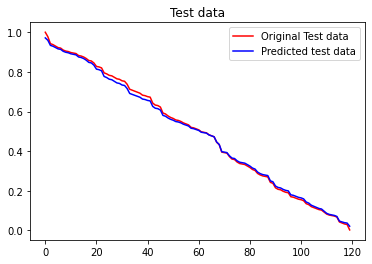

In [78]:
import matplotlib.pyplot as plt

plt.plot(test_labels, 'r', label='Original Test data')
plt.plot( test_predictions, 'b', label='Predicted test data')
plt.title('Test data')
plt.legend()

plt.show()